In [1]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import math

from pathlib import Path

from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
# from common.utils import load_data, mape
from IPython.display import Image

from statsmodels. graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.arima_model import ARMA 

%matplotlib inline
plt.rcParams['figure.figsize']=(12,6)
pd.options.display.float_format='{:,.2f}'.format
np.set_printoptions(precision=2)
warnings.filterwarnings('ignore')


print(os.getcwd())
datpath=Path('C:/Users/hiwuq/OneDrive/Qian Learning/ML/Datasets')
print(datpath)

C:\Users\hiwuq
C:\Users\hiwuq\OneDrive\Qian Learning\ML\Datasets


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.60,19.20,44.79,19.79,44.73,19.00,45.57,...,17.03,45.53,6.60,733.50,92.00,7.00,63.00,5.30,13.28,13.28
2016-01-11 17:10:00,60,30,19.89,46.69,19.20,44.72,19.79,44.79,19.00,45.99,...,17.07,45.56,6.48,733.60,92.00,6.67,59.17,5.20,18.61,18.61
2016-01-11 17:20:00,50,30,19.89,46.30,19.20,44.63,19.79,44.93,18.93,45.89,...,17.00,45.50,6.37,733.70,92.00,6.33,55.33,5.10,28.64,28.64
2016-01-11 17:30:00,50,40,19.89,46.07,19.20,44.59,19.79,45.00,18.89,45.72,...,17.00,45.40,6.25,733.80,92.00,6.00,51.50,5.00,45.41,45.41
2016-01-11 17:40:00,60,40,19.89,46.33,19.20,44.53,19.79,45.00,18.89,45.53,...,17.00,45.40,6.13,733.90,92.00,5.67,47.67,4.90,10.08,10.08
2016-01-11 17:50:00,50,40,19.89,46.03,19.20,44.50,19.79,44.93,18.89,45.73,...,17.00,45.29,6.02,734.00,92.00,5.33,43.83,4.80,44.92,44.92
2016-01-11 18:00:00,60,50,19.89,45.77,19.20,44.50,19.79,44.90,18.89,45.79,...,17.00,45.29,5.90,734.10,92.00,5.00,40.00,4.70,47.23,47.23
2016-01-11 18:10:00,60,50,19.86,45.56,19.20,44.50,19.73,44.90,18.89,45.86,...,17.00,45.29,5.92,734.17,91.83,5.17,40.00,4.68,33.04,33.04
2016-01-11 18:20:00,60,40,19.79,45.60,19.20,44.43,19.73,44.79,18.89,45.79,...,17.00,45.29,5.93,734.23,91.67,5.33,40.00,4.67,31.46,31.46


<class 'pandas.core.frame.DataFrame'>
Index: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 

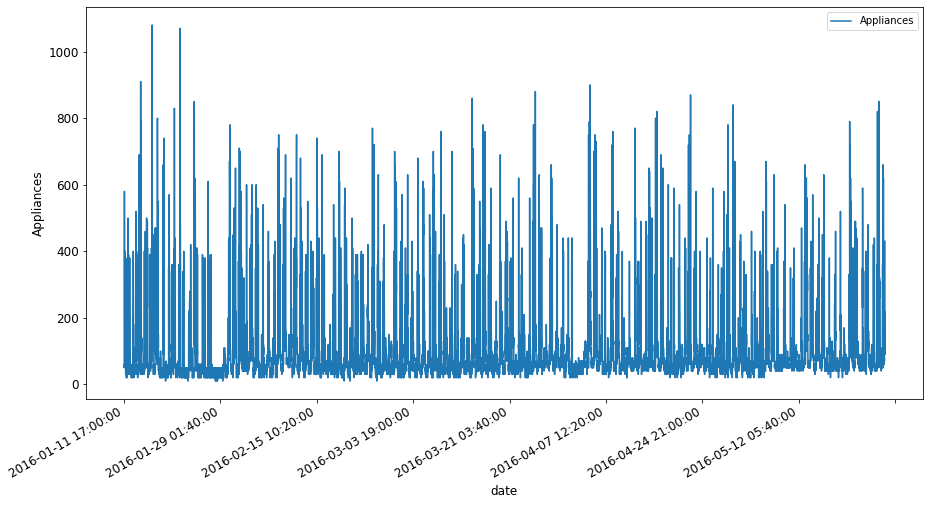

In [93]:
energy=pd.read_csv(datpath/'energydata.csv',header=0, index_col='date')
display(energy.head(10))
energy.info()

energy.plot(y='Appliances', subplots=True, figsize=(15,8), fontsize=12)
plt.xlabel('date',fontsize=12)
plt.ylabel('Appliances',fontsize=12)
plt.show()


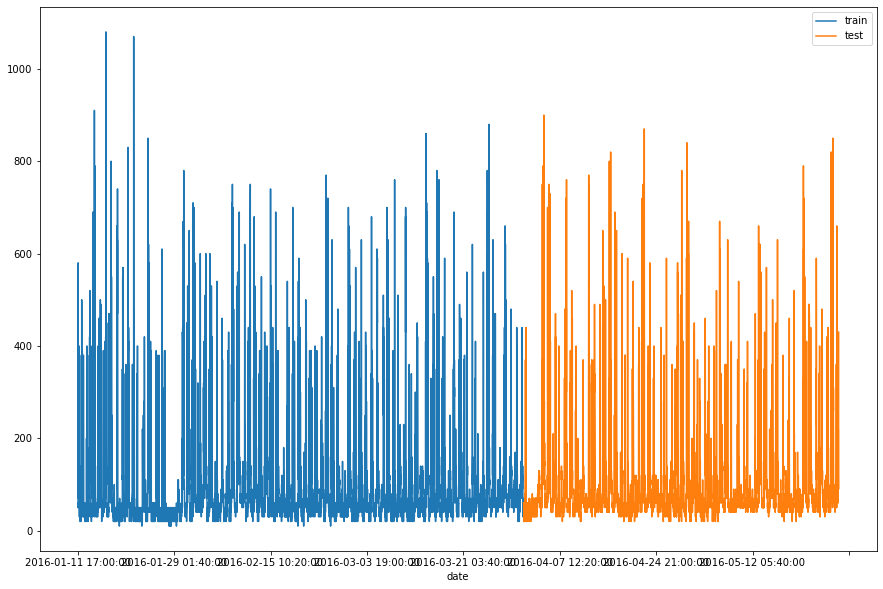

(11562, 36) (8173, 36)


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,rv1,rv2,dt_orig,year,month,day,weekday,hour,weekend,AM
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.60,19.20,44.79,19.79,44.73,19.00,45.57,...,13.28,13.28,2016-01-11 17:00:00,2016,1,11,0,17,False,False
2016-01-11 17:10:00,60,30,19.89,46.69,19.20,44.72,19.79,44.79,19.00,45.99,...,18.61,18.61,2016-01-11 17:10:00,2016,1,11,0,17,False,False
2016-01-11 17:20:00,50,30,19.89,46.30,19.20,44.63,19.79,44.93,18.93,45.89,...,28.64,28.64,2016-01-11 17:20:00,2016,1,11,0,17,False,False
2016-01-11 17:30:00,50,40,19.89,46.07,19.20,44.59,19.79,45.00,18.89,45.72,...,45.41,45.41,2016-01-11 17:30:00,2016,1,11,0,17,False,False
2016-01-11 17:40:00,60,40,19.89,46.33,19.20,44.53,19.79,45.00,18.89,45.53,...,10.08,10.08,2016-01-11 17:40:00,2016,1,11,0,17,False,False


In [95]:
energy['dt_orig']=pd.to_datetime(energy.index,format='%Y-%m-%d %H:%M:%S')
# energy.info()
energy['year']=energy['dt_orig'].dt.year
energy['month']=energy['dt_orig'].dt.month
energy['day']=energy['dt_orig'].dt.day
energy['weekday']=energy['dt_orig'].dt.dayofweek
energy['hour']=energy['dt_orig'].dt.hour
energy['weekend']=energy['weekday'].apply(lambda x: x in {5,6})
energy['AM']=energy['hour'].apply(lambda x: x <12)


train=energy[energy.index<'2016-04-01 00:00:00']
test=energy[energy.index>='2016-04-01 00:00:00']

energy[energy.index<'2016-04-01 00:00:00'][['Appliances']].rename(columns={'Appliances':'train'})\
.join(energy[energy.index>='2016-04-01 00:00:00'][['Appliances']].rename(columns={'Appliances':'test'}), how='outer')\
.plot(y=['train','test'],figsize=(15,10))
plt.show()

print(train.shape, test.shape)
display(energy.head(5))

<AxesSubplot:xlabel='weekend'>

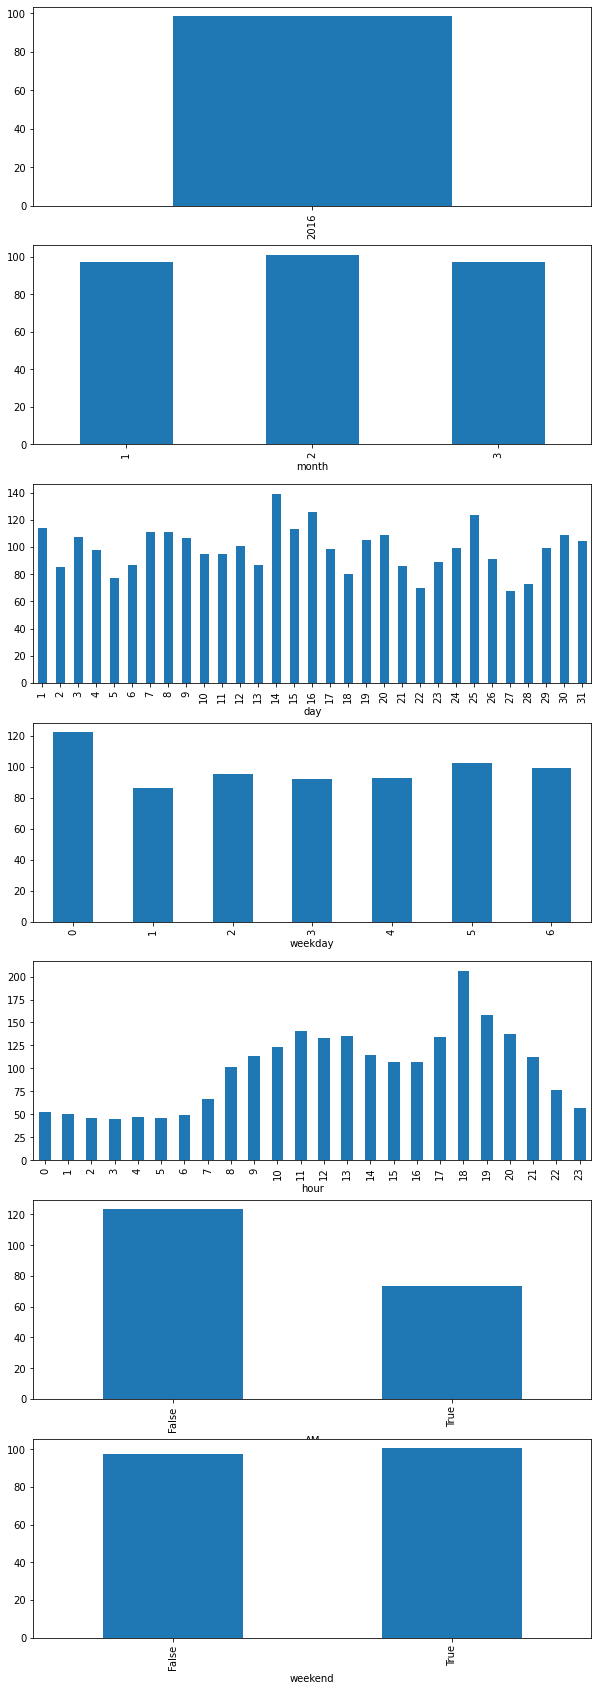

In [96]:
## visuallize
fig=plt.figure(figsize=(10,30))
ax1=fig.add_subplot(711)
train.groupby('year')['Appliances'].mean().plot.bar(ax=ax1)
ax2=fig.add_subplot(712)
train.groupby('month')['Appliances'].mean().plot.bar(ax=ax2)
ax3=fig.add_subplot(713)
train.groupby('day')['Appliances'].mean().plot.bar(ax=ax3)
ax4=fig.add_subplot(714)
train.groupby('weekday')['Appliances'].mean().plot.bar(ax=ax4)
ax5=fig.add_subplot(715)
train.groupby('hour')['Appliances'].mean().plot.bar(ax=ax5)
ax6=fig.add_subplot(716)
train.groupby('AM')['Appliances'].mean().plot.bar(ax=ax6)
ax7=fig.add_subplot(717)
train.groupby('weekend')['Appliances'].mean().plot.bar(ax=ax7)




<AxesSubplot:xlabel='dt_orig'>

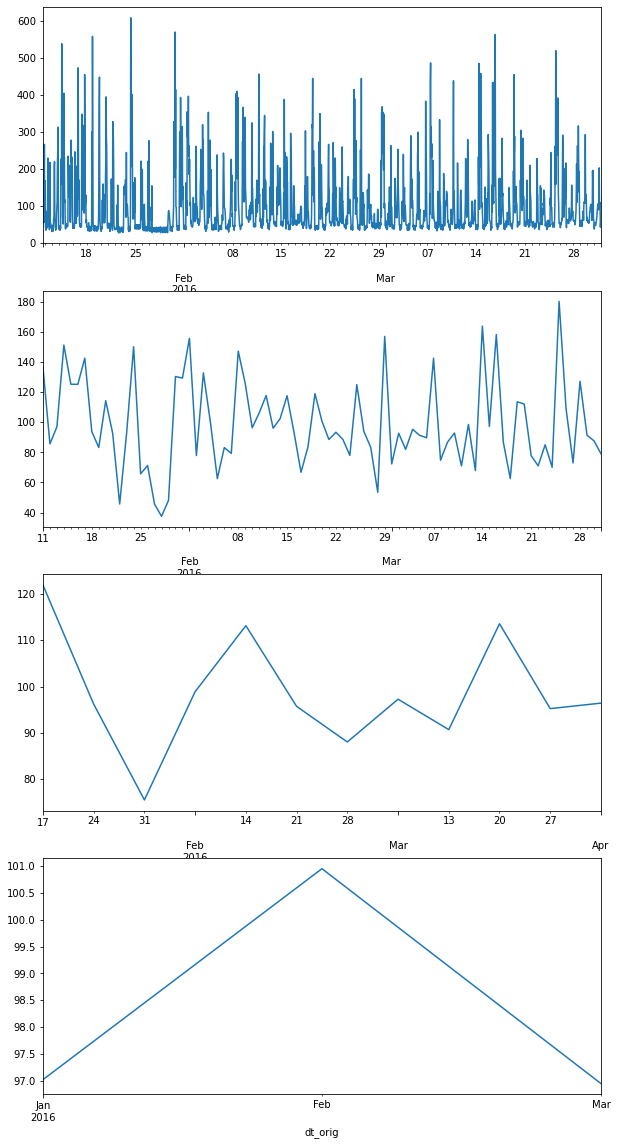

In [97]:
## resample
train.index=train.dt_orig
monthly=train['Appliances'].resample('M').mean()
daily=train['Appliances'].resample('D').mean()
weekly=train['Appliances'].resample('W').mean()
hourly=train['Appliances'].resample('H').mean()


fig2,axes=plt.subplots(4,1,figsize=(10,20))
hourly.plot(ax=axes[0])
daily.plot(ax=axes[1])
weekly.plot(ax=axes[2])
monthly.plot(ax=axes[3])


In [121]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

## naive prediction 
y_hat=test.copy()
naive=np.asarray(train.Appliances)[train.shape[0]-1]

## MA
ma=train['Appliances'].rolling(20).mean().iloc[-1]

## SES
ses_fit=SimpleExpSmoothing(np.asarray(train.Appliances)).fit(smoothing_level=0.6, optimized=False)
ses=ses_fit.forecast(1).squeeze()


## Holt
holt_fit=Holt(np.asarray(train.Appliances)).fit(smoothing_level=0.2, smoothing_slope=0.6)
holt=holt_fit.forecast(1).squeeze()


## Holt-winter
hw_fit=ExponentialSmoothing(np.asarray(train.Appliances),seasonal_periods=72, trend='add', seasonal='add').fit()
hw=hw_fit.forecast(test.shape[0])

print(hw)

[   34.95     9.22   -13.44 ...  -925.11 -1034.48 -1021.14]


In [127]:
## Dicky-Fuller test 

dftest=adfuller(train['Appliances'],autolag='AIC')
dftestout=pd.Series(dftest, index=['Test Statistic', 'Pvalue', '#lags used', 'Nbr of Obs used','Critical Values','max info criterion'])
print(dftestout)

Test Statistic                                                   -16.40
Pvalue                                                             0.00
#lags used                                                           12
Nbr of Obs used                                                   11549
Critical Values       {'1%': -3.4309163480868223, '5%': -2.861790295...
max info criterion                                           129,953.68
dtype: object


<AxesSubplot:xlabel='dt_orig'>

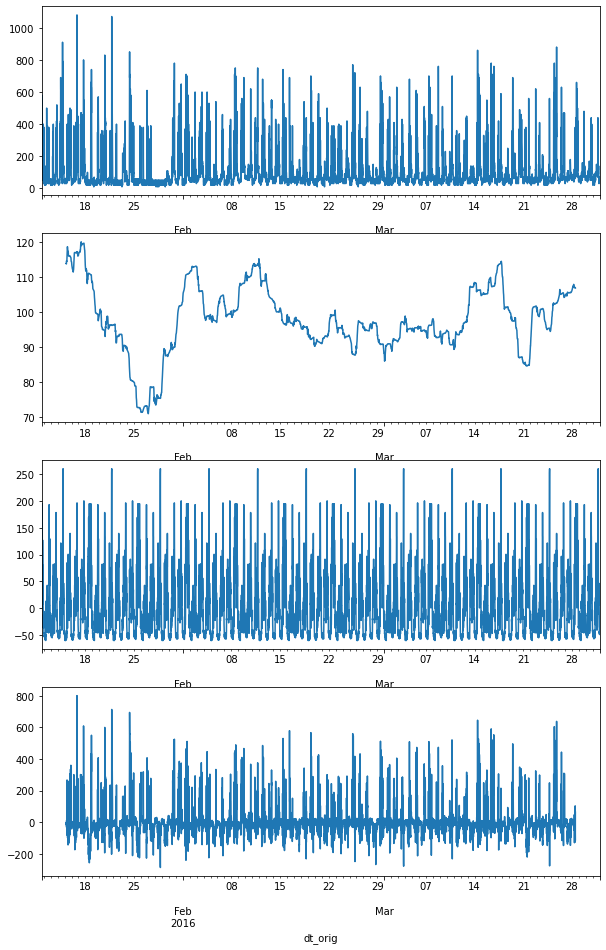

In [138]:
from statsmodels.tsa.seasonal import seasonal_decompose
## seasonality decomposition

decomp=seasonal_decompose(train.Appliances, freq=1008)
trend=decomp.trend
seasonal=decomp.seasonal
resid=decomp.resid

fig3,axes=plt.subplots(4,1,figsize=(10,16))
train.Appliances.plot(label='Original', ax=axes[0])
trend.plot(label='Original', ax=axes[1])
seasonal.plot(label='Original', ax=axes[2])
resid.plot(label='Original', ax=axes[3])


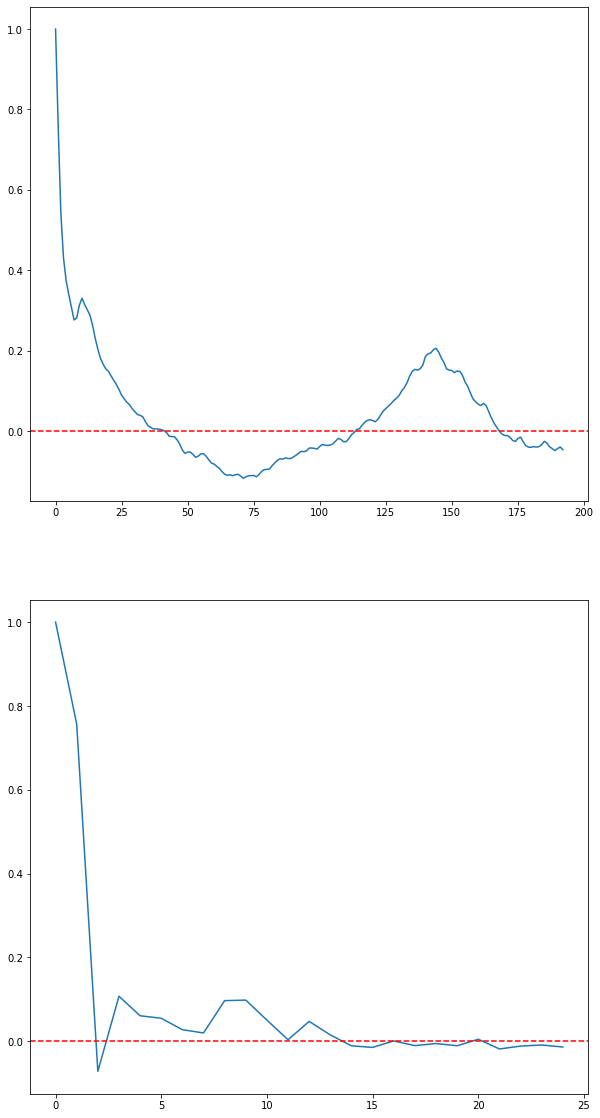

In [148]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(train.Appliances, nlags=192)
lag_pacf=pacf(train.Appliances, nlags=24, method='ols')

fig3=plt.figure(figsize=(10,20))
ax1=fig3.add_subplot(211)
pd.Series(data=lag_acf).plot(ax=ax1)
plt.axhline(y=0, linestyle='--', color='red')
ax2=fig3.add_subplot(212)
pd.Series(data=lag_pacf).plot(ax=ax2)
plt.axhline(y=0, linestyle='--', color='red')

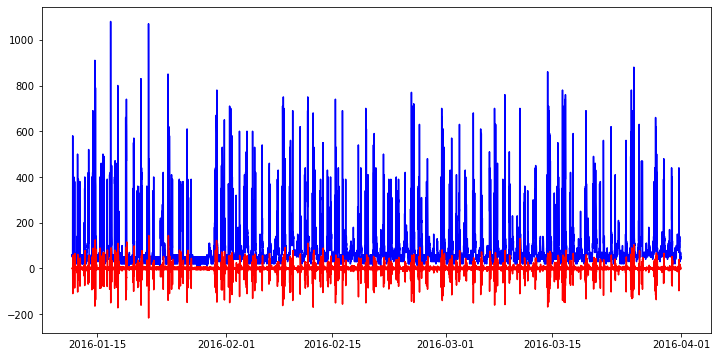

In [157]:
from statsmodels.tsa.arima_model import ARIMA
## AR

AR=ARIMA(train.Appliances, order=(6,1,0)).fit()

plt.plot(train.Appliances, color='blue', label='Original')
plt.plot(AR.fittedvalues, color='red', label='Predicted')
plt.show()

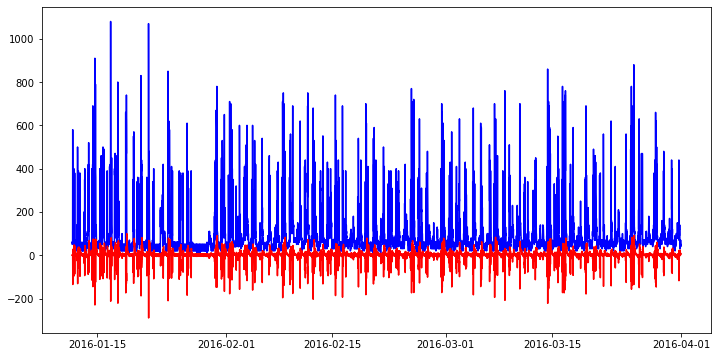

dt_orig
2016-01-11 17:00:00    60
2016-01-11 17:10:00    60
2016-01-11 17:20:00    50
2016-01-11 17:30:00    50
2016-01-11 17:40:00    60
                       ..
2016-03-31 23:10:00    50
2016-03-31 23:20:00    60
2016-03-31 23:30:00    40
2016-03-31 23:40:00    50
2016-03-31 23:50:00    50
Name: Appliances, Length: 11562, dtype: int64
dt_orig
2016-01-11 17:10:00   -0.00
2016-01-11 17:20:00   -0.00
2016-01-11 17:30:00    0.65
2016-01-11 17:40:00    2.25
2016-01-11 17:50:00    0.44
                       ... 
2016-03-31 23:10:00    1.49
2016-03-31 23:20:00    3.31
2016-03-31 23:30:00    4.67
2016-03-31 23:40:00    5.71
2016-03-31 23:50:00    7.23
Length: 11561, dtype: float64


In [159]:
from statsmodels.tsa.arima_model import ARIMA
## AR

MA=ARIMA(train.Appliances, order=(0,1,5)).fit()

plt.plot(train.Appliances, color='blue', label='Original')
plt.plot(MA.fittedvalues, color='red', label='Predicted')
plt.show()

print(train.Appliances)
print(MA.fittedvalues)